In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from dscribe.descriptors import SOAP
from rdkit.Chem import rdmolfiles
import seaborn as sns

def get_SOAP_traditional(species, coords, central_atom, rcut, nmax, lmax):

    mol = rdmolfiles.MolFromXYZFile(coords)

    central_atom_index = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == central_atom]
    atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    atom_positions = mol.GetConformer().GetPositions()

    atoms = Atoms(symbols=atom_symbols, positions=atom_positions)

    soap = SOAP(
        species=species,
        periodic=False,
        r_cut=float(rcut),
        n_max=int(nmax),
        l_max=int(lmax)
    )

    soap_power_spectrum = soap.create(atoms, centers=central_atom_index)

    return soap_power_spectrum

In [2]:
SOAP_dims_29_1 = np.zeros((10,10))
SOAP_dims_315_1 = np.zeros((10,10))

SOAP_dims_29_2 = np.zeros((10,10))
SOAP_dims_315_2 = np.zeros((10,10))

species_29 = ['Pt', 'Cl']
species_315 = ['Pt', 'Cl', 'N', 'H']

central_atom = 'Pt'
coords_29 = '/home/alex/Pt_NMR/data/structures/total/st_29.xyz'
coords_315 = '/home/alex/Pt_NMR/data/structures/total/st_315.xyz'

rcut_1 = 2.0
rcut_2 = 5.0

for nmax in range(1,11):
    for lmax in range(1,11):

        soap_output_29_1 = get_SOAP_traditional(species_29, coords_29, central_atom, rcut_1, nmax, lmax)
        soap_output_315_1 = get_SOAP_traditional(species_315, coords_315, central_atom, rcut_1, nmax, lmax)
        soap_output_29_2 = get_SOAP_traditional(species_29, coords_29, central_atom, rcut_2, nmax, lmax)
        soap_output_315_2 = get_SOAP_traditional(species_315, coords_315, central_atom, rcut_2, nmax, lmax)


        dim_29_1 = soap_output_29_1.shape[1]
        print(dim_29_1)
        dim_315_1 = soap_output_315_1.shape[1]
        print(dim_315_1)
        dim_29_2 = soap_output_29_2.shape[1]
        print(dim_29_2)
        dim_315_2 = soap_output_315_2.shape[1]
        print(dim_315_2)


        SOAP_dims_29_1[nmax-1][lmax-1] = dim_29_1
        SOAP_dims_315_1[nmax-1][lmax-1] = dim_315_1
        SOAP_dims_29_2[nmax-1][lmax-1] = dim_29_2
        SOAP_dims_315_2[nmax-1][lmax-1] = dim_315_2

6
20
6
20
9
30
9
30
12
40
12
40
15
50
15
50
18
60
18
60
21
70
21
70
24
80
24
80
27
90
27
90
30
100
30
100
33
110
33
110
20
72
20
72
30
108
30
108
40
144
40
144
50
180
50
180
60
216
60
216
70
252
70
252
80
288
80
288
90
324
90
324
100
360
100
360
110
396
110
396
42
156
42
156
63
234
63
234
84
312
84
312
105
390
105
390
126
468
126
468
147
546
147
546
168
624
168
624
189
702
189
702
210
780
210
780
231
858
231
858
72
272
72
272
108
408
108
408
144
544
144
544
180
680
180
680
216
816
216
816
252
952
252
952
288
1088
288
1088
324
1224
324
1224
360
1360
360
1360
396
1496
396
1496
110
420
110
420
165
630
165
630
220
840
220
840
275
1050
275
1050
330
1260
330
1260
385
1470
385
1470
440
1680
440
1680
495
1890
495
1890
550
2100
550
2100
605
2310
605
2310
156
600
156
600
234
900
234
900
312
1200
312
1200
390
1500
390
1500
468
1800
468
1800
546
2100
546
2100
624
2400
624
2400
702
2700
702
2700
780
3000
780
3000
858
3300
858
3300
210
812
210
812
315
1218
315
1218
420
1624
420
1624
525
2030
525
203

[ 1  2  3  4  5  6  7  8  9 10]


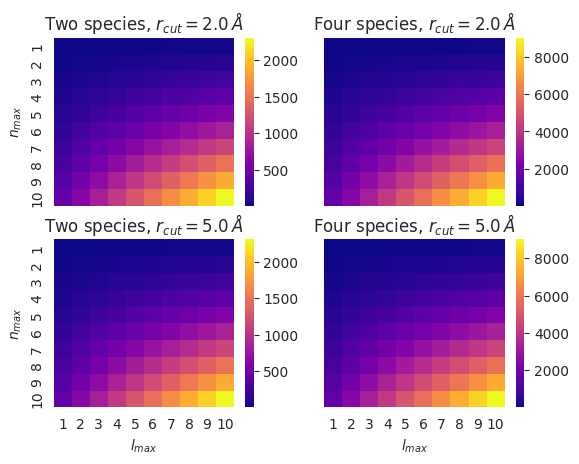

In [88]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.heatmap(SOAP_dims_29_1, ax=ax1, cmap='plasma')
sns.heatmap(SOAP_dims_315_1, ax=ax2, cmap='plasma')
sns.heatmap(SOAP_dims_29_2, ax=ax3, cmap='plasma')
sns.heatmap(SOAP_dims_315_2, ax=ax4, cmap='plasma')

ax3.set_xlabel('$l_{max}$')
ax4.set_xlabel('$l_{max}$')

ax1.set_ylabel('$n_{max}$')
ax3.set_ylabel('$n_{max}$')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax2.set_yticklabels([])
ax4.set_yticklabels([])

ticklabels = np.arange(1,11,1)
print(ticklabels)

ax3.set_xticklabels(ticklabels)
ax4.set_xticklabels(ticklabels)

ax1.set_yticklabels(ticklabels)
ax3.set_yticklabels(ticklabels)

ax1.set_title('Two species, $r_{cut}=2.0 \,\AA$')
ax2.set_title('Four species, $r_{cut}=2.0 \, \AA$')

ax3.set_title('Two species, $r_{cut}=5.0 \, \AA$')
ax4.set_title('Four species, $r_{cut}=5.0 \, \AA$')

plt.show()


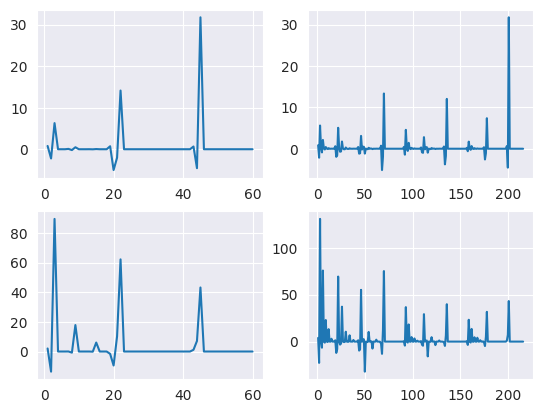

In [3]:
fig_2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

soap_output_29_1 = get_SOAP_traditional(species_29, coords_29, central_atom, rcut_1, 2, 5)
soap_output_315_1 = get_SOAP_traditional(species_315, coords_315, central_atom, rcut_1, 2, 5)

soap_output_29_2 = get_SOAP_traditional(species_29, coords_29, central_atom, rcut_2, 2, 5)
soap_output_315_2 = get_SOAP_traditional(species_315, coords_315, central_atom, rcut_2, 2, 5)

x_29 = np.arange(1, soap_output_29_1.shape[1]+1, 1)
x_315 = np.arange(1, soap_output_315_1.shape[1]+1, 1)

ax1.plot(x_29, soap_output_29_1.flatten())
ax2.plot(x_315, soap_output_315_1.flatten())

ax3.plot(x_29, soap_output_29_2.flatten())
ax4.plot(x_315, soap_output_315_2.flatten())

plt.show()


In [145]:
class CustomSoap:

    def __init__(self, coords, species, central_atom, nmax, lmax, rcut):
        self.coords = coords
        self.species = species
        self.central_atom = central_atom
        self.nmax = nmax
        self.lmax = lmax
        self.rcut = rcut

    def get_atom_coords(self):

        with open(self.coords, 'r') as xyz_file:
            xyz_file = xyz_file.readlines()[2:]

            symbol_list = []
            coord_list = []

            for line in xyz_file:
                symbol = line.split()[0]
                coords = [float(coord) for coord in line.split()[1:]]

                symbol_list.append(symbol)
                coord_list.append(coords)

        return symbol_list, coord_list


    def transform_coords(self):

        atom_symbols, atom_coords = self.get_atom_coords()

        for symbol, coord in zip(atom_symbols, atom_coords):
            if symbol == self.central_atom:
                central_coord = coord

        transformed_coords = []

        for coord in atom_coords:
            transformed_coords.append(np.array(coord) - np.array(central_coord))

        return transformed_coords


    def get_density(self, coord, variance=1.0):

        r = np.linspace((0,0,0),(20,20,20),20)
        density = np.exp(-((r-coord))**2/(2*variance))

        return density

    def sum_density(self):

        


xyz_file = '/home/alex/Pt_NMR/data/structures/total/st_315.xyz'
soap = CustomSoap(coords=xyz_file, species=['Pt', 'Cl', 'N', 'H'], central_atom='Pt', nmax=2, lmax=2, rcut=2.0)

soap.atomic_density()

[[ 0.          0.          0.        ]
 [ 1.05263158  1.05263158  1.05263158]
 [ 2.10526316  2.10526316  2.10526316]
 [ 3.15789474  3.15789474  3.15789474]
 [ 4.21052632  4.21052632  4.21052632]
 [ 5.26315789  5.26315789  5.26315789]
 [ 6.31578947  6.31578947  6.31578947]
 [ 7.36842105  7.36842105  7.36842105]
 [ 8.42105263  8.42105263  8.42105263]
 [ 9.47368421  9.47368421  9.47368421]
 [10.52631579 10.52631579 10.52631579]
 [11.57894737 11.57894737 11.57894737]
 [12.63157895 12.63157895 12.63157895]
 [13.68421053 13.68421053 13.68421053]
 [14.73684211 14.73684211 14.73684211]
 [15.78947368 15.78947368 15.78947368]
 [16.84210526 16.84210526 16.84210526]
 [17.89473684 17.89473684 17.89473684]
 [18.94736842 18.94736842 18.94736842]
 [20.         20.         20.        ]]
[[-5e-06, 0.184661, -2e-06], [1.758366, -1.42051, -0.003388], [-1.758338, -1.420533, 0.003392], [1.487141, 2.259785, -0.795927], [1.526471, 2.198161, 0.853525], [2.417088, 1.126049, -0.032687], [-1.526479, 2.198171, -0.

0